California census data: Housing Prices

Seunguk Jung

### 2.3 데이터 가져오기
작업환경 만들기 : CUAI GPU & Anaconda env 완료

#### 2.3.2 데이터 다운로드

In [51]:
# 데이터를 추출하는 함수
import os
import tarfile
import urllib 

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    """호출하면 현재 작업공간에 datasets/housing 디렉터리를 만들고 
    housin.tgz 파일을 내려받고 같은 디렉터리에 압축 풀어 housing.csv 파일 만듦"""
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path) 
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close() 


In [52]:
fetch_housing_data()

In [53]:
# 데이터 읽기
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
    """모든 데이터를 담은 판다스의 데이터프레임 객체를 반환"""
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

#### 2.3.3 데이터 구조 훑어보기 

In [54]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [55]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


`total_bedrooms` 20,433개로 null 값 존재   
`ocean_proximity` datatype == object -> Categorical 범주형,  
각 카테고리 마다 얼마나 많은 구역 있을까

In [56]:
housing["ocean_proximity"].value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

숫자형 특성의 요약정보

In [57]:
housing.describe() 

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

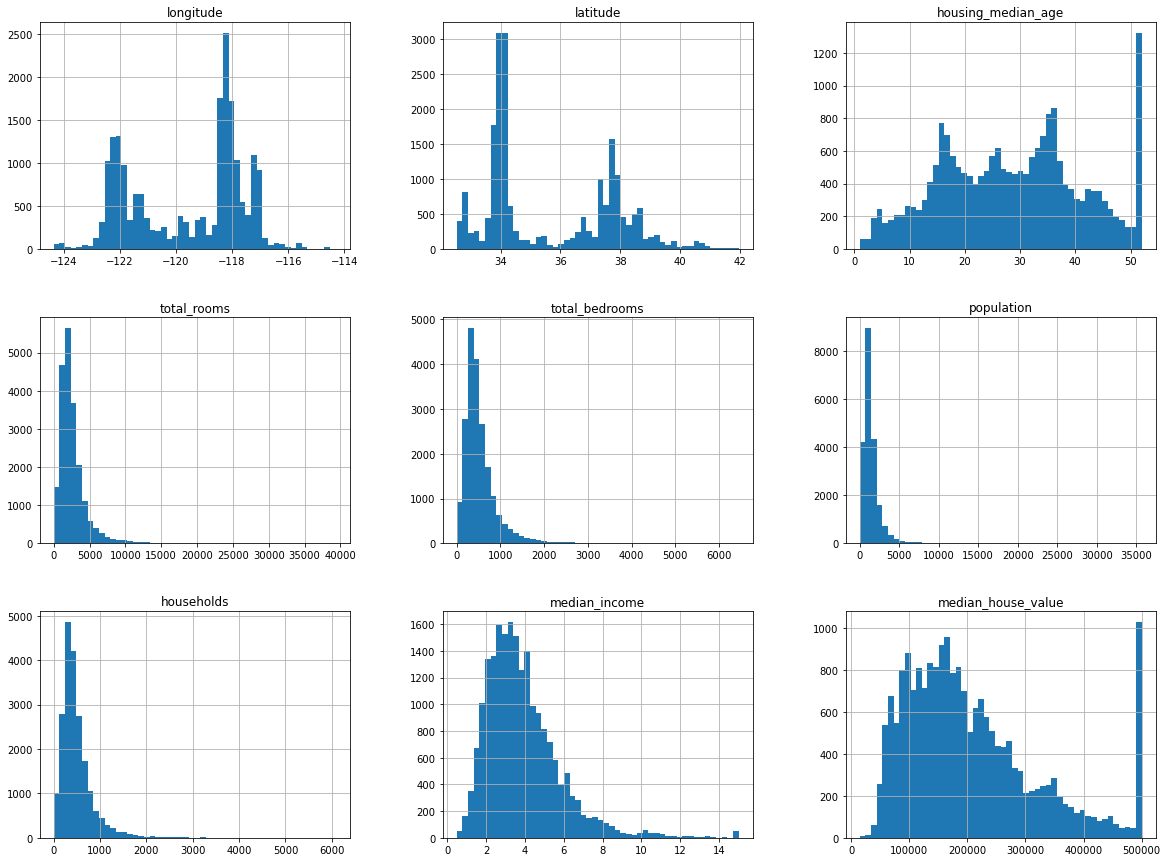

In [58]:
# Histogram
#%matplotlib inline # 주피터 노트북의 매직명령: 그래프가 노트북 안에 그려지게 하는 명령어
import matplotlib.pyplot as plt 
housing.hist(bins = 50, figsize = (20,15)) 
plt.show()

* `median income` == US$ 30,000 상한 15 하한 0.5    
* feature scale 이 서로 많이 다름 
* 히스토그램 꼬리가 두꺼움

#### 2.3.4 테스트 세트 만들기

In [59]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [60]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [61]:
# 새로운 테스트 세트는 새 샘플의 20%를 갖게 되지만 이전에 훈련세트에 있던 샘플은 포함 x
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2*32 

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [62]:
housing_with_id = housing.reset_index() # 'index'열이 추가된 데이터프레임이 반환 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [63]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"] 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [64]:
from sklearn.model_selection import train_test_split 

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

중간 소득 중간주택 가격에 매우 중요    
소득에 대한 카테고리(범주형) 특성을 만들어야함!

<AxesSubplot:>

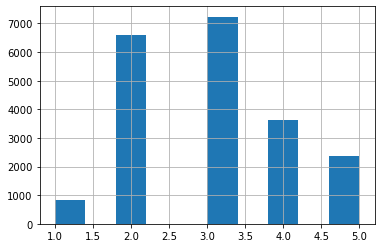

In [65]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                                            bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                            labels = [1,2,3,4,5])
housing["income_cat"].hist()

소득 카테고리를 기반으로 계층 샘플링

In [66]:
from sklearn.model_selection import StratifiedShuffleSplit 

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42) 
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

테스트 세트에서 소득 카테고리의 비율

In [67]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

income_cat 특성 삭제, 데이터 원래 상태로 복구

In [68]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

### 2.4 데이터 이해를 위한 탐색과 시각화

In [69]:
housing = strat_train_set.copy()

#### 2.4.1 지리적 데이터 시각화

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

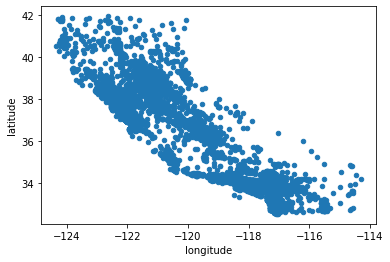

In [70]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

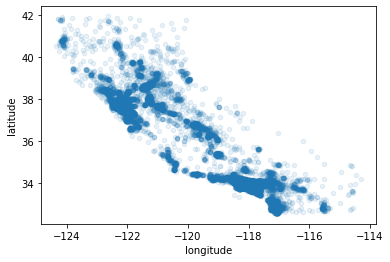

In [71]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1) 

데이터 포인트가 밀집된 영역을 보여줌

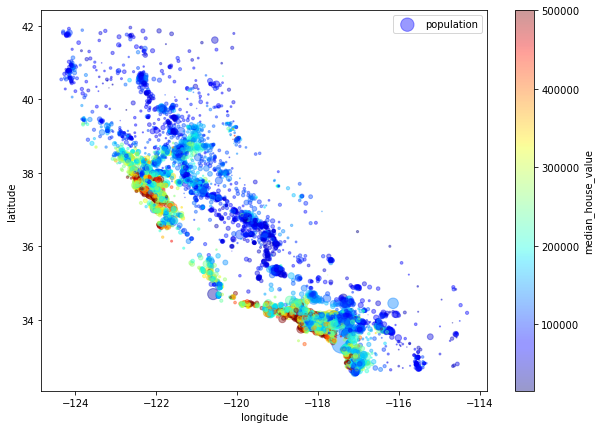

In [72]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, 
        s = housing["population"]/100, label = "population", figsize=(10,7), 
        c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
        sharex = False)
plt.legend()
# 매개변수 s : 원의 반지름; 구역의 인구 
# 매개변수 c : 색상; 가격 
# 매개변수 cmap: 미리 정의된 컬러 맵 중 파란색 (낮은가격)-> 빨간색(높은가격)까지 범위를 가지는 jet

#### 2.4.2 상관관계 조사  
표준상관계수 standard correlation coefficient   
피어슨 pearson의 r : corr() method

In [73]:
corr_matrix = housing.corr()

In [74]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

중간 주택 가격과 다른 특성 사이의 상관관계 크기  

상관관계 범위 -1 부터 1 까지.  
1에 가까우면 강한 양의 상관관계  

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

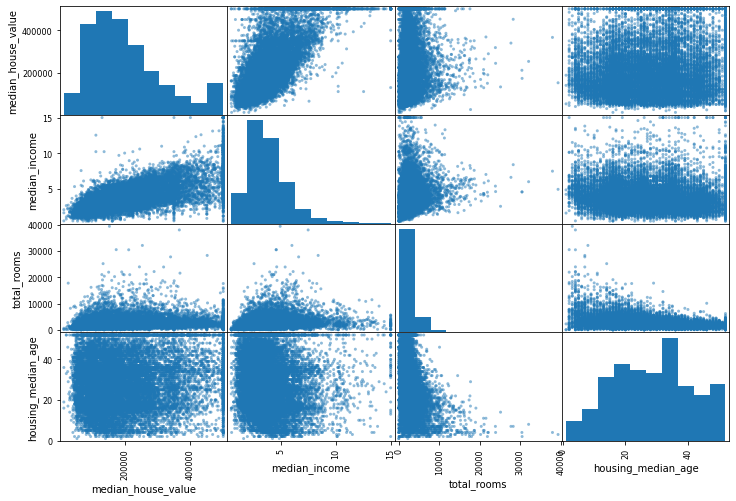

In [75]:
from pandas.plotting import scatter_matrix 

attributes = ["median_house_value", "median_income", "total_rooms",
                "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

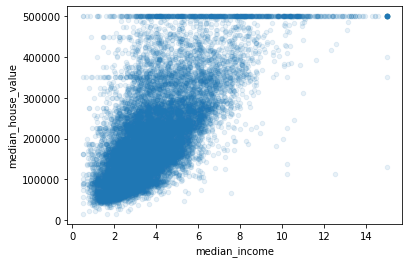

In [76]:
# median_house_value & median_income 중간주택가격 & 중간소득
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value",
            alpha = 0.1)

* 상관관계가 매우 강함.   
* 위쪽으로 향하는 경향, 포인트 들이 너무 널리 퍼져있지 않음.     

* 가격 제한값이 $500,000에서 수평선으로 잘보임.  
* 직선에 가까운 가격대 더 볼 수 있음.  
-> 알고리즘이 데이터에서 이런 이상한 형태를 학습하지 않도록 해야함. 
-> 해당 구역 제거

#### 2.4.3 특성 조합으로 실험

In [77]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"] # 가구당 방 개수 
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"] # 
housing["population_per_household"] = housing["population"] / housing["households"] 

In [78]:
# 상관관계 행렬 다시 확인 
corr_matrix = housing.corr() 
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

`bedrooms_per_room`특성은 전체 방개수나 침실 개수보다 중간 주택 가격과의 상관관계가 훨씬 높음  
-> 침실/방의 비율이 낮은 집은 더 비싼 경향이 있다.   

가구당 방 개수도 구역 내 전체 방 개숟보다 더 유용하다.  

### 2.5 머신러닝 알고리즘을 위한 데이터 준비

In [79]:
# 원래 훈련 세트로 복원 
# 예측 변수와 타깃값에 같은 변형을 적용하지 않기 위해 예측 변수와 레이블을 분리 

housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

#### 2.5.1 데이터 정제

In [80]:
# total_bedrooms 특성에 값이 없는 경우.
#1 해당 구역 제거
#2 전체 특성 삭제
#3 어떤 값으로 채움 (0, mean, median 등)

housing.dropna(subset = ["total_bedrooms"]) #1
housing.drop("total_bedrooms", axis = 1) #2
median = housing["total_bedrooms"].median() #3 누락된 값 median으로 채워야

housing["total_bedrooms"].fillna(median, inplace = True)

In [81]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

In [82]:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [83]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [84]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [85]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [86]:
X = imputer.transform(housing_num) # 변형된 특성들이 들어있는 넘파이 배열

In [87]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, 
                        index = housing_num.index)

#### 2.5.2 텍스트와 범주형 특성 다루기

In [88]:
# ocean_proximity
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN

In [89]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]



array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [90]:
# categories_ 인스턴스 변수르 사용해 카테고리 목록을 얻을 수 있음 
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [91]:
# 가까이 있는 두 값이 떨어져 있는 두값 보다 더 비슷하다고 인식하는 문제
# 카테 고리별 이진 특성을 만들어 해결 
# One-hot Encoding

from sklearn.preprocessing import OneHotEncoder 
cat_encoder = OneHotEncoder() 
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

# not numby array, Scipy sparse matrix

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [92]:
# p104 0을 모두 메모리에 저장하는 것은 낭비 이므로 희소 행렬은 0이 아닌 원소의 위치만 저장 
# to numpy array, use toarray() method!

housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [93]:
# 인코더의 categories_ 인스턴스 변수를 상요해 카테고리 리스트를 얻을 수 있다. 
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### 2.5.3 나만의 변환기

In [94]:
# duck typing
from sklearn.base import BaseEstimator, TransformerMixin 

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):  #*args, **kargs 아님
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X):
        return self # 더 할 일 없음
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                        bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room= False)
housing_extra_attribs = attr_adder.transform(housing.values)






#### 2.5.4 특성 스케일링 
* Normalization & Standardization

#### 2.5.5  변환 파이프라인  
Scikit-learn 연속된 변환을 순서대로 처리할 수 있도록 도와주는 Pipeline 클래스

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [96]:
# 각 열마다 적절한 변환을 적용하며 모든 열을 처리해야한다면?

from sklearn.compose import ColumnTransformer 

num_attribs = list(housing_num) 
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), 
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [97]:
# OneHotEncoder는 희소 행렬 (Sparse matrix) 반환
# num_pipeline은 밀집 행렬을 반환 
# ColumnTransformer는 최종 행렬의 밀집 정도를 추정, 밀집도가 임계값 보다 낮으면 희소행렬 반환  

# 전체 주택 데이터를 받아 각 열에 적절한 변환을 적용하는 전처리 파이프라인을 만듦

### 2.6 모델 선택과 훈련  
훈련세트와 테스트 세트로 나누고  
머신러닝 알고리즘에 주입할 데이터를 자동으로 정제하고 준비하기 위해 변환 파이프라인 작성  
머신러닝을 선택하고 훈련!

#### 2.6.1 훈련세트에서 훈련하고 평가하기 

In [98]:
# linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels) 


LinearRegression()

In [99]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [101]:
some_data_prepared = full_pipeline.transform(some_data) 
print("예측: ", lin_reg.predict(some_data_prepared))
print("레이블: ", list(some_labels))

예측:  [ 86208. 304704. 153536. 185728. 244416.]
레이블:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [102]:
# RMSE 측정  
from sklearn.metrics import mean_squared_error 
housing_predictions = lin_reg.predict(housing_prepared) 
lin_mse = mean_squared_error(housing_labels, housing_predictions) 
lin_rmse = np.sqrt(lin_mse) 
lin_rmse 
# 모델이 훈련 데이터에 과소 적합된 사례임 

68633.40810776998

In [103]:
# DecisionTreeRegressor 훈련.
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor() 
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [104]:
# 모델 훈련 시킨 후 훈련 세트로 평가  
housing_predictions = tree_reg.predict(housing_prepared) 
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse) 
tree_rmse 

# 데이터에 너무 심하게 과대적합 됨

0.0

#### 2.6.2 교차 검증을 사용한 평가  
k-fold cross-validation 
훈련세트를 fold라 불리는 10개의 subset으로 무작위 분할.  
그런 다음 결정 트리 모델을 10번 훈련하고 평가,   
매번 다른 폴드를 선택해 평가에 사용하고 나머지 9개 폴드는 훈련에 사용.  

In [105]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

# 평균 제곱 오차가 작을 수록 좋은 비용 함수이므로 부호가 반대가 되어야 scoring 매개변수 정의에 맞다!  

In [107]:
# 결과  
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

display_scores(tree_rmse_scores) 

# 선형 회귀 모델보다 나쁨

점수: [74110.30071016 70322.81040569 67788.98524253 70958.06904851
 69785.20119651 77245.28623156 71610.35331603 72729.04430616
 69075.07282255 72093.92021492]
평균: 71571.90434945984
표준편차: 2567.4433214285204


In [108]:
# 선형회귀 모델의 점수 계산  

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                            scoring = "neg_mean_squared_error", cv = 10)

lin_rmse_scores = np.sqrt(-lin_scores) 
display_scores(lin_rmse_scores)

점수: [71800.38078269 64114.99166359 67844.95431254 68635.19072082
 66801.98038821 72531.04505346 73992.85834976 68824.54092094
 66474.60750419 70143.79750458]
평균: 69116.4347200802
표준편차: 2880.6588594759014


In [109]:
# # randomforest regressor 하나 더 시도  

# from sklearn.ensemble import RandomForestRegressor 
# forest_reg = RandomForestRegressor()
# forest_reg.fit(housing_prepared, housing_labels) 
# [...]
# forest_rmse 
# display_scores(forest_rmse_scores)

NameError: name 'forest_rmse' is not defined

In [ ]:
# import joblib
# joblib.dump(mymodel, "my_model.pkl")
# # 나중에 
# my_model_loaded = joblib.load("my_model.pkl")

### 2.7 모델 세부 튜닝
#### 2.7.1 그리드 탐색

In [110]:
# 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용해 평가  
from sklearn.model_selection import GridSearchCV 

param_grid = [ 
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, 
                        scoring = 'neg_mean_squared_error', 
                        return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [111]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [112]:
# 최적의 추정기에 직접 접근할 수도 있음 
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [117]:
# 평가 점수도 확인! 
cvres = grid_search.cv_results_ 
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(np.sqrt(-mean_score), params) 

65061.60171156699 {'max_features': 2, 'n_estimators': 3}
55694.41330150453 {'max_features': 2, 'n_estimators': 10}
52583.84765526505 {'max_features': 2, 'n_estimators': 30}
60350.92001920196 {'max_features': 4, 'n_estimators': 3}
52763.678051274044 {'max_features': 4, 'n_estimators': 10}
50337.4545306346 {'max_features': 4, 'n_estimators': 30}
59681.39161367124 {'max_features': 6, 'n_estimators': 3}
51992.23320702731 {'max_features': 6, 'n_estimators': 10}
49978.35774610648 {'max_features': 6, 'n_estimators': 30}
59475.102945753715 {'max_features': 8, 'n_estimators': 3}
52312.32212602743 {'max_features': 8, 'n_estimators': 10}
50081.53811571095 {'max_features': 8, 'n_estimators': 30}
61547.000007133625 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54003.223329903616 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60899.55018681128 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52507.35585914091 {'bootstrap': False, 'max_features': 3, 'n_estimators':

최적의 솔루션  

max_features == 8,  
n_estimators == 30 

#### 2.7.2 랜덤 탐색 
#### 2.7.3 앙상블 방법
#### 2.7.4 최상의 모델과 오차 분석 

In [118]:
feature_importances = grid_search.best_estimator_.feature_importances_ 
feature_importances

array([7.50124744e-02, 7.15106073e-02, 4.34419363e-02, 1.79994840e-02,
       1.63113918e-02, 1.75506685e-02, 1.66513454e-02, 3.65415324e-01,
       4.53160390e-02, 1.09403831e-01, 6.95954450e-02, 1.32336454e-02,
       1.29998912e-01, 8.10719356e-05, 4.00867765e-03, 4.46914704e-03])

In [120]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs 

sorted(zip(feature_importances, attributes), reverse = True)

[(0.3654153242079936, 'median_income'),
 (0.12999891151324683, 'INLAND'),
 (0.10940383051109624, 'pop_per_hhold'),
 (0.0750124743994265, 'longitude'),
 (0.07151060726426256, 'latitude'),
 (0.06959544502839006, 'bedrooms_per_room'),
 (0.04531603898219016, 'rooms_per_hhold'),
 (0.04344193633108561, 'housing_median_age'),
 (0.01799948402953787, 'total_rooms'),
 (0.017550668493068685, 'population'),
 (0.016651345356154597, 'households'),
 (0.016311391812118207, 'total_bedrooms'),
 (0.013233645438588574, '<1H OCEAN'),
 (0.004469147042503164, 'NEAR OCEAN'),
 (0.004008677654712396, 'NEAR BAY'),
 (8.107193562499923e-05, 'ISLAND')]

#### 2.7.5 테스트 세트로 시스템 평가하기

In [124]:
final_model = grid_search.best_estimator_ 

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy() 

X_test_prepared = full_pipeline.transform(X_test)


final_predictions = final_model.predict(X_test_prepared) 

final_mse = mean_squared_error(y_test, final_predictions) 
final_rmse = np.sqrt(final_mse) 
print(final_rmse)

47894.68187170171


In [128]:
# 95% confidence interval
from scipy import stats 
confidence = 0.95 
squared_errors = (final_predictions - y_test) ** 2 
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1, 
                        loc = squared_errors.mean(), 
                        scale = stats.sem(squared_errors)))

array([45916.35627952, 49794.47086972])

---
END